In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product

In [61]:
data = pd.read_csv('Sunspots.csv')
data = data.rename(columns={'Monthly Mean Total Sunspot Number':'Sunspots'})
data = data.drop('Unnamed: 0', axis=1)
data.info()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)
#data['Sunspots'] = pd.to_numeric(data['Sunspots'], downcast='float')
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3265 non-null   object 
 1   Sunspots  3265 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


Sunspots
Date                
1749-01-31      96.7
1749-02-28     104.3
1749-03-31     116.7
1749-04-30      92.8
1749-05-31     141.7
...              ...
2020-09-30       0.6
2020-10-31      14.4
2020-11-30      34.0
2020-12-31      21.8
2021-01-31      10.4

[3265 rows x 1 columns]

In [20]:
print(data['Sunspots'].unique())

[ 96.7 104.3 116.7 ...   3.1   9.4  21.8]


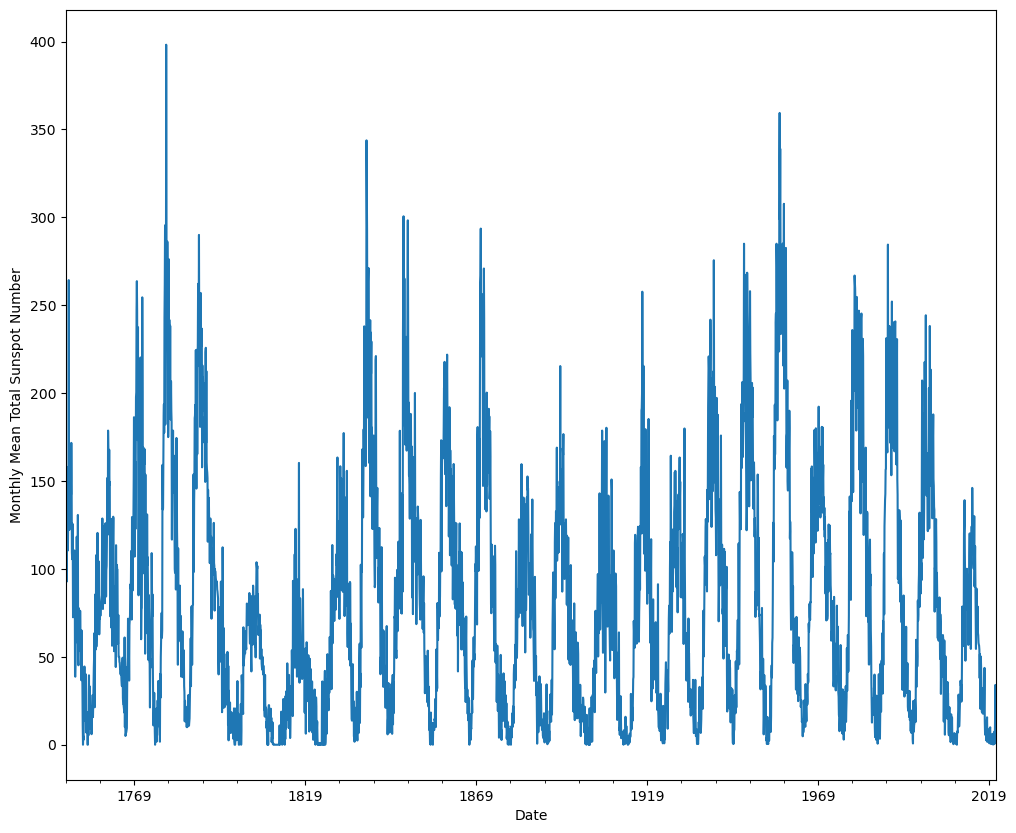

In [21]:
data['Sunspots'].plot()
plt.ylabel('Monthly Mean Total Sunspot Number');

Критерий Дики-Фуллера: p=0.000000
(-10.497051662546143, 1.1085524921956343e-18, 28, 3236, {'1%': -3.4323724026124003, '5%': -2.8624335760905684, '10%': -2.5672456699774324}, 29834.491003687108)


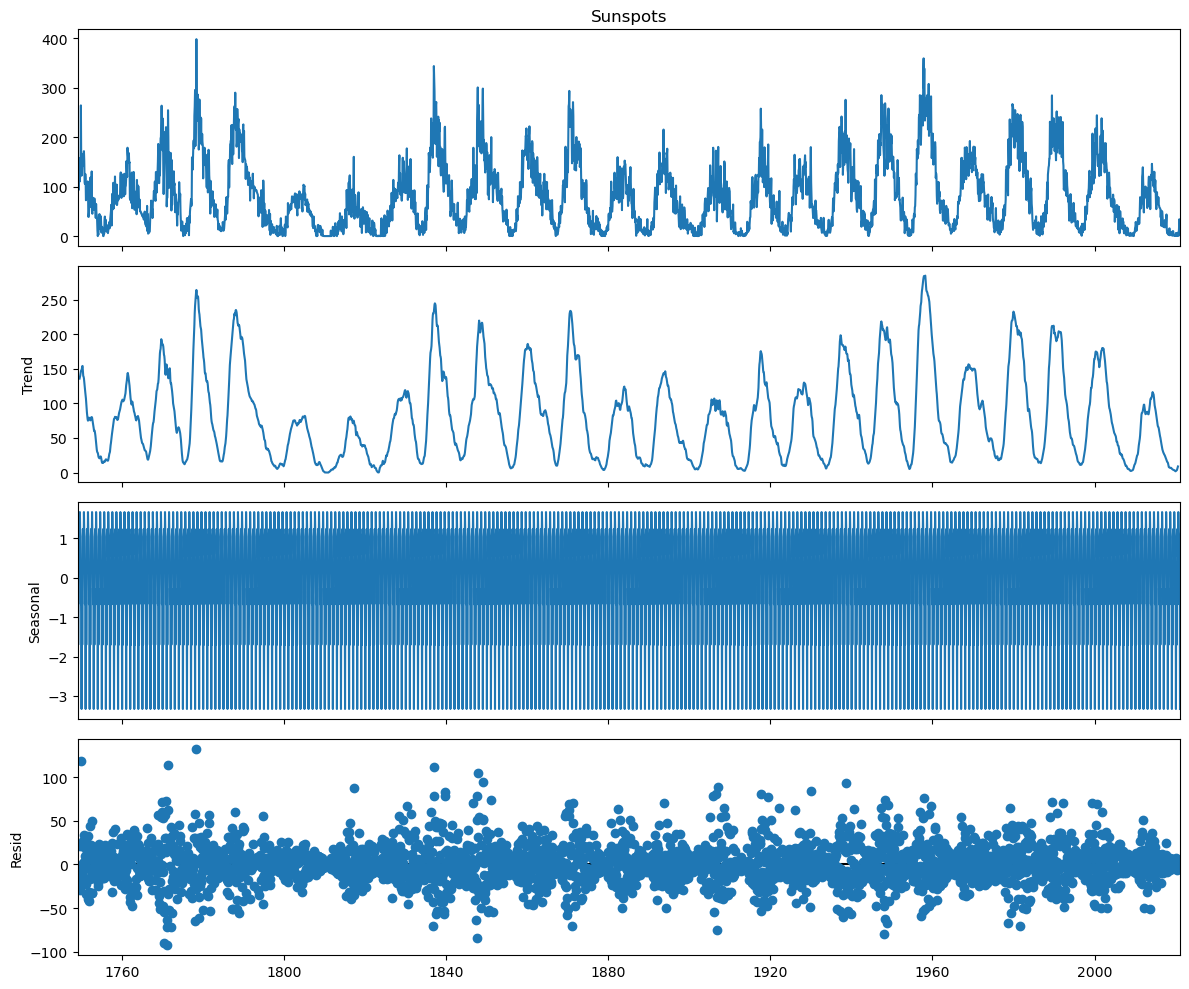

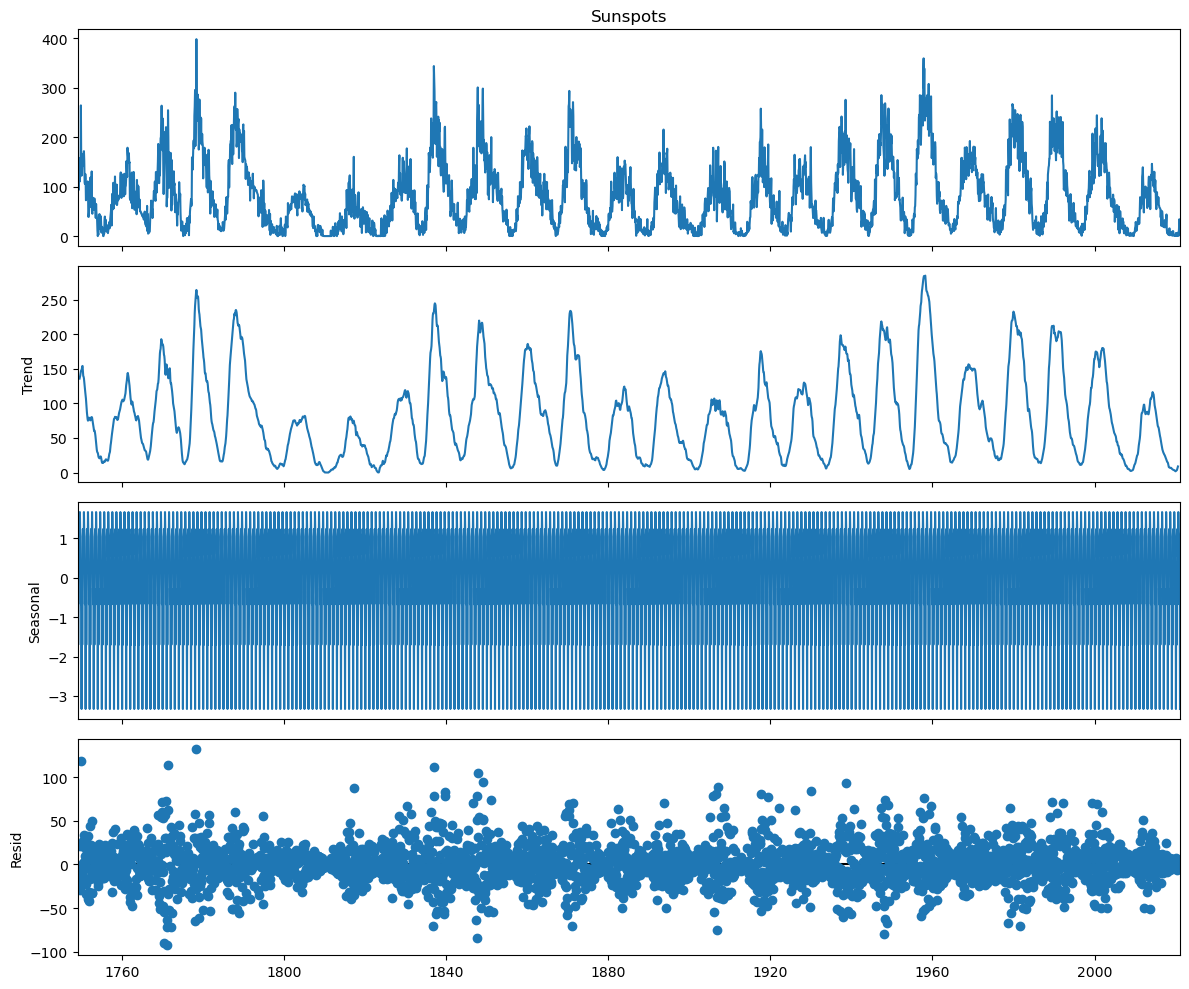

In [22]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data['Sunspots'])[1])
print(sm.tsa.stattools.adfuller(data['Sunspots']))
sm.tsa.seasonal_decompose(data['Sunspots']).plot()

Критерий Дики-Фуллера: p=0.000000


(-13.877198799854632,
 6.306660701725257e-26,
 26,
 3188,
 {'1%': -3.432402877410845,
  '5%': -2.8624470364005785,
  '10%': -2.5672528359839046},
 31560.94859368076)

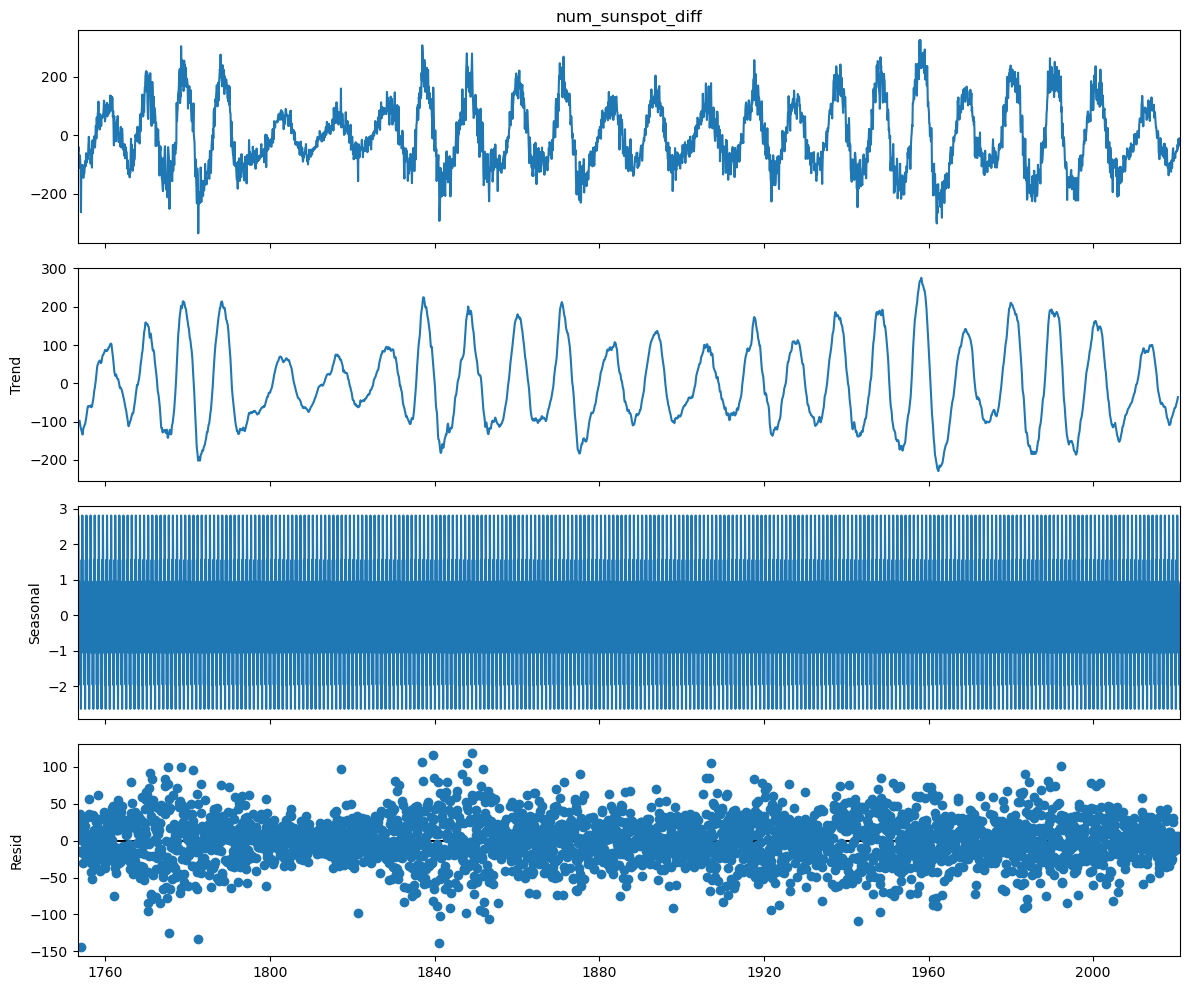

In [23]:
i = 50
data['num_sunspot_diff'] = data['Sunspots'] - data['Sunspots'].shift(i)
sm.tsa.seasonal_decompose(data['num_sunspot_diff'][i:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data['num_sunspot_diff'][i:])[1])
sm.tsa.stattools.adfuller(data['num_sunspot_diff'][i:])

Критерий Дики-Фуллера: p=0.000000


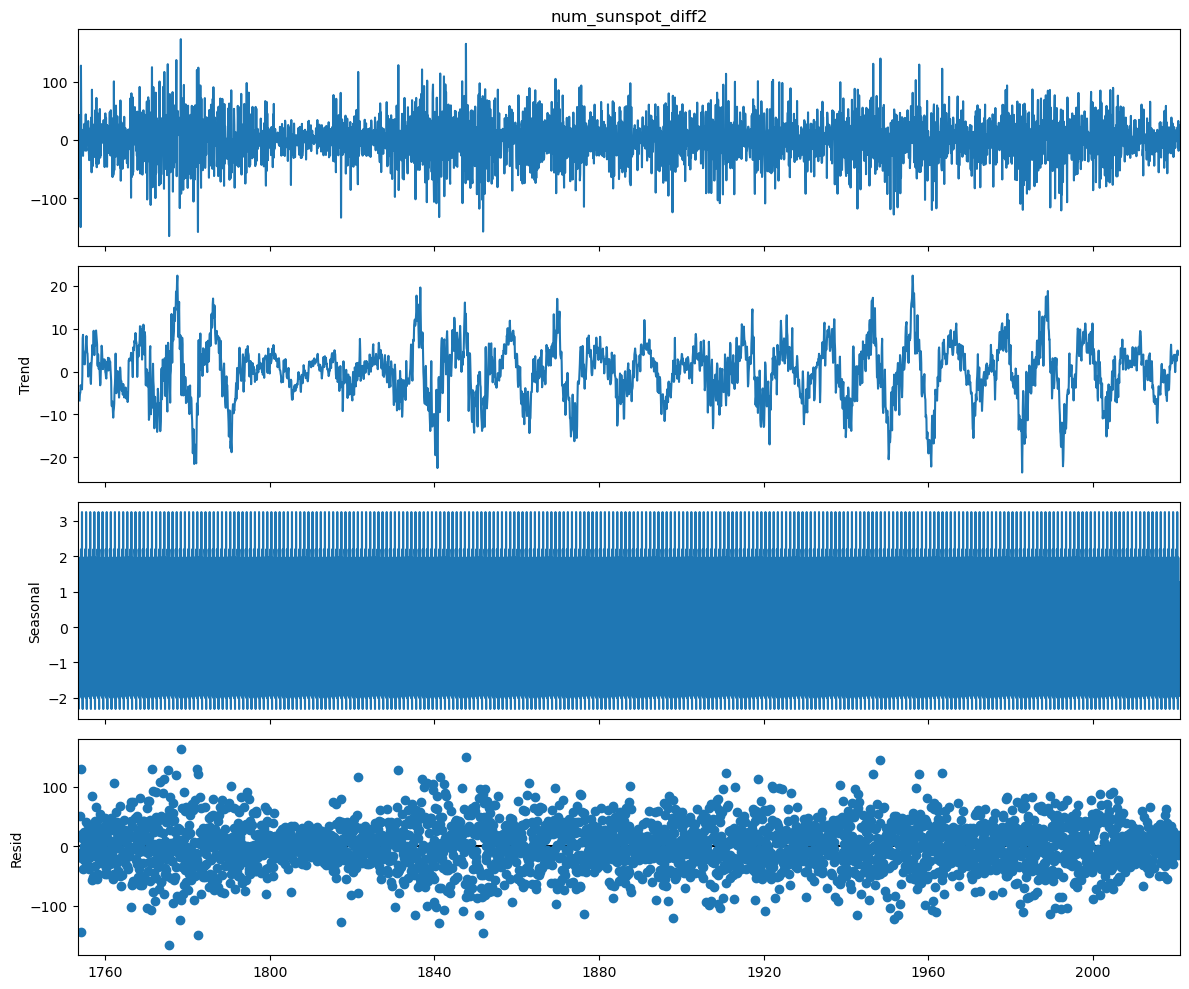

In [24]:
j = 1
data['num_sunspot_diff2'] = data['num_sunspot_diff'] - data['num_sunspot_diff'].shift(j)
sm.tsa.seasonal_decompose(data['num_sunspot_diff2'][i+j:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data['num_sunspot_diff2'][i+j:])[1])

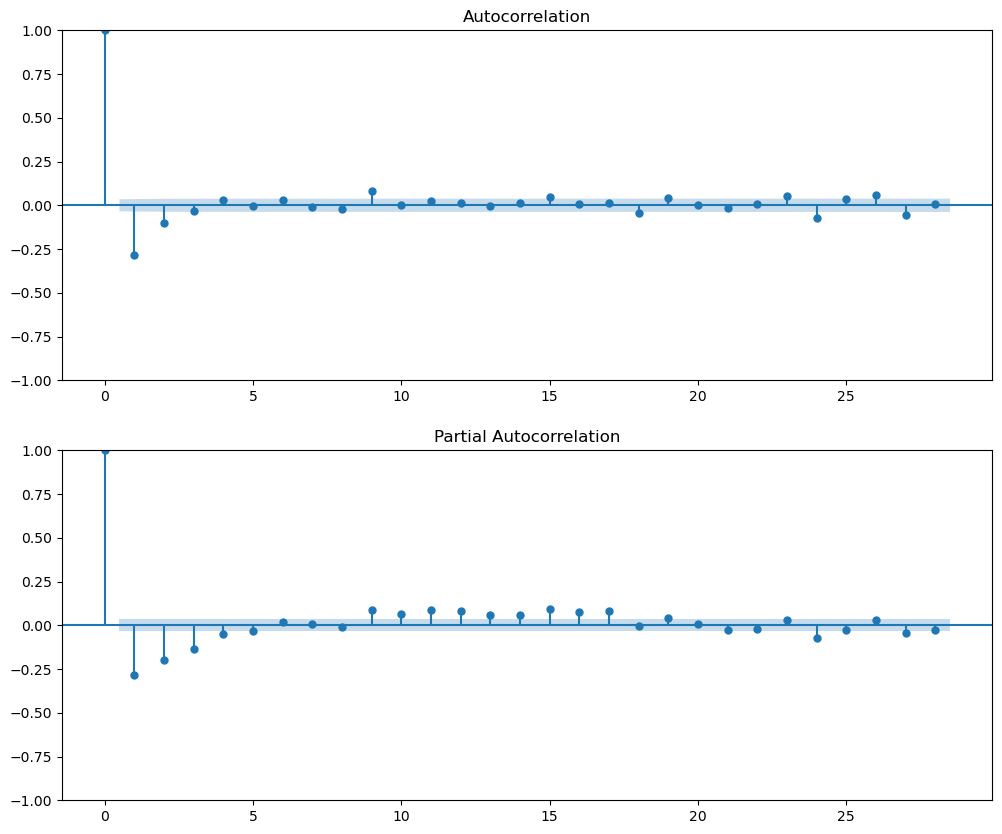

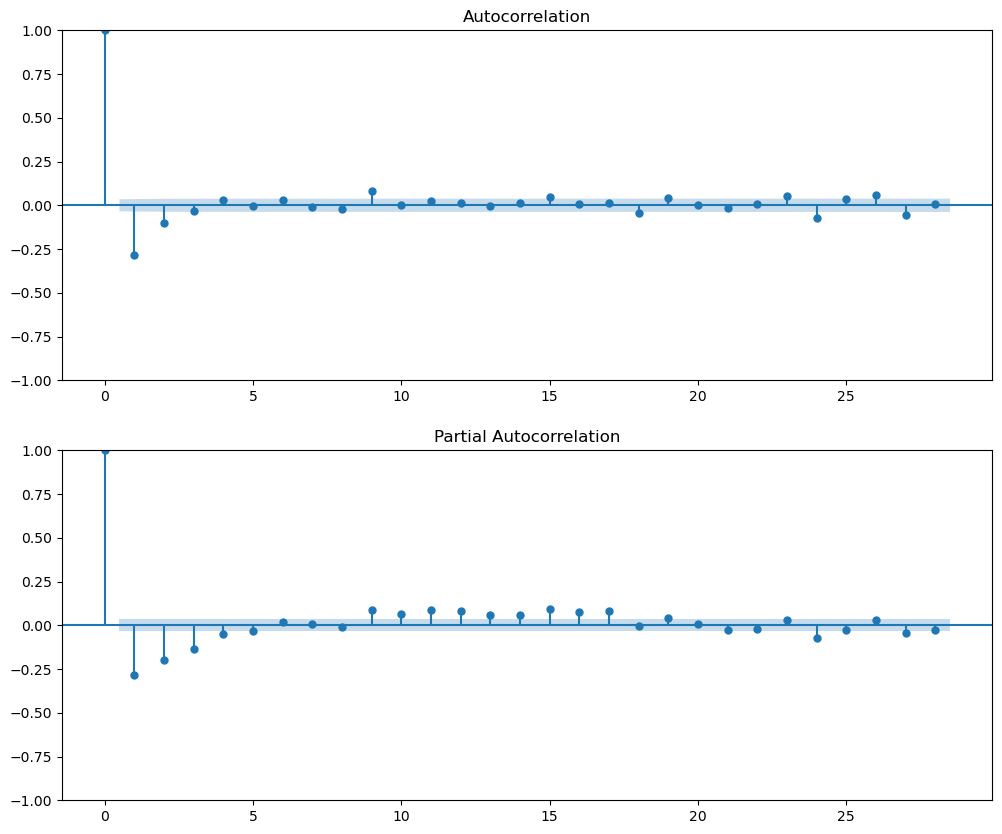

In [25]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data['num_sunspot_diff2'][i+j:].values.squeeze(), lags=28, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data['num_sunspot_diff2'][i+j:].values.squeeze(), lags=28, ax=ax)

In [26]:
ps = range(0, 3)
d=1
qs = range(0, 1)
Ps = range(0, 3)
D=1
Qs = range(0, 3)

In [27]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

27

In [28]:

# %%time
# import warnings
# results = []
# best_aic = float("inf")



# for param in parameters_list:
#     #try except нужен, потому что на некоторых наборах параметров модель не обучается
#     try:
#         model=sm.tsa.statespace.SARIMAX(data['Sunspots'], order=(param[0], d, param[1]), 
#                                         seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
#     #выводим параметры, на которых модель не обучается и переходим к следующему набору
#     except ValueError:
#         print('wrong parameters:', param)
#         continue
#     aic = model.aic
#     #сохраняем лучшую модель, aic, параметры
#     if aic < best_aic:
#         best_model = model
#         best_aic = aic
#         best_param = param
#     results.append([param, model.aic])
    
# warnings.filterwarnings('default')

In [31]:
# result_table = pd.DataFrame(results)
# result_table.columns = ['parameters', 'aic']
# print(result_table.sort_values(by = 'aic', ascending=True).head())

In [32]:
print(best_model.summary())

NameError: name 'best_model' is not defined

NameError: name 'best_model' is not defined

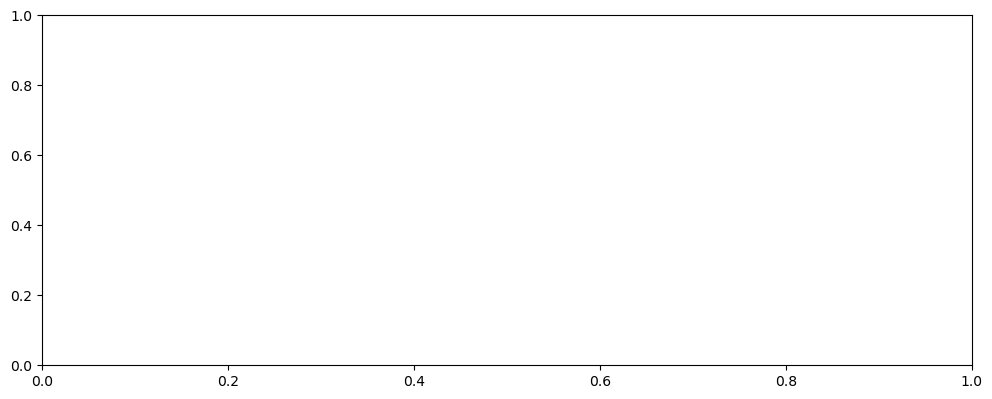

In [33]:
plt.subplot(211)
best_model.resid[i+j:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[i+j:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[i+j:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[i+j:])[1])

In [34]:
data['model'] = best_model.fittedvalues
data['Sunspots'].plot()
data['model'][i+j:].plot(color='r')
plt.ylabel('Accidental deaths');

NameError: name 'best_model' is not defined

In [35]:
from dateutil.relativedelta import relativedelta
import datetime
data2 = data[['Sunspots']]
date_list = [datetime.datetime.strptime("2022-01-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,300)]
future = pd.DataFrame(index=date_list, columns=data2.columns)
data2 = pd.concat([data2, future])
data2['forecast'] = best_model.predict(start=3246, end=3565)

data2['Sunspots'].plot(color='b')
data2['forecast'].plot(color='r')
plt.ylabel('Sunspots');

NameError: name 'best_model' is not defined

In [36]:
pd.DataFrame(date_list).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.5 KB


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sunspots           3265 non-null   float64
 1   num_sunspot_diff   3215 non-null   float64
 2   num_sunspot_diff2  3214 non-null   float64
dtypes: float64(3)
memory usage: 102.0 KB


In [38]:
pd.DataFrame(future).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2022-01-01 to 2046-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sunspots  0 non-null      object
dtypes: object(1)
memory usage: 4.7+ KB


In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3565 entries, 1749-01-31 to 2046-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sunspots  3265 non-null   float64
dtypes: float64(1)
memory usage: 55.7 KB


In [40]:
data2.iloc[3240:3270]

Sunspots
2019-01-31       7.7
2019-02-28       0.8
2019-03-31       9.4
2019-04-30       9.1
2019-05-31       9.9
2019-06-30       1.2
2019-07-31       0.9
2019-08-31       0.5
2019-09-30       1.1
2019-10-31       0.4
2019-11-30       0.5
2019-12-31       1.5
2020-01-31       6.2
2020-02-29       0.2
2020-03-31       1.5
2020-04-30       5.2
2020-05-31       0.2
2020-06-30       5.8
2020-07-31       6.1
2020-08-31       7.5
2020-09-30       0.6
2020-10-31      14.4
2020-11-30      34.0
2020-12-31      21.8
2021-01-31      10.4
2022-01-01       NaN
2022-02-01       NaN
2022-03-01       NaN
2022-04-01       NaN
2022-05-01       NaN

In [41]:
data

Sunspots  num_sunspot_diff  num_sunspot_diff2
Date                                                     
1749-01-31      96.7               NaN                NaN
1749-02-28     104.3               NaN                NaN
1749-03-31     116.7               NaN                NaN
1749-04-30      92.8               NaN                NaN
1749-05-31     141.7               NaN                NaN
...              ...               ...                ...
2020-09-30       0.6             -31.8              -18.8
2020-10-31      14.4             -35.8               -4.0
2020-11-30      34.0             -10.6               25.2
2020-12-31      21.8             -11.6               -1.0
2021-01-31      10.4             -11.0                0.6

[3265 rows x 3 columns]

In [47]:
import pandas as pd
import cufflinks as cf

# Настройка режима офлайн для работы с cufflinks и plotly
cf.go_offline()

# Визуализация данных (например, потребление энергии по глобальной активной мощности)
data['Sunspots'].iplot(title='Household Power Consumption', xTitle='Date', yTitle='Sunspots')

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

#data = data.drop(['num_sunspot_diff', 'num_sunspot_diff2', 'model'], axis=1)
result = seasonal_decompose(data, model='additive', period=114)

# Визуализация сезонной составляющей с использованием cufflinks
seasonal_component = result.seasonal
seasonal_df = pd.DataFrame(seasonal_component)
seasonal_df.columns = ['Seasonality']
seasonal_df.iplot(title='Seasonal Component of Household Power Consumption')

In [49]:
# Извлечение трендовой составляющей
trend_component = result.trend
trend_df = pd.DataFrame(trend_component)
trend_df.columns = ['Trend']

# Визуализация трендовой составляющей с использованием cufflinks
trend_df.iplot(title='Trend Component of Household Power Consumption')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sunspots  3265 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB


In [51]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
# Вычисление ACF и PACF
lags = 114  # Для 114 месяцев
acf_values = acf(data, nlags=lags)
pacf_values = pacf(data, nlags=lags, method='ols')

# Создание DataFrame для ACF и PACF
df_acf = pd.DataFrame({'lags': np.arange(0, lags+1), 'acf': acf_values})
df_pacf = pd.DataFrame({'lags': np.arange(0, lags+1), 'pacf': pacf_values})

# Визуализация ACF
df_acf.iplot(kind='bar', x='lags', y='acf', title='ACF of Household Power Consumption', xTitle='Lags', yTitle='ACF Values')

# Визуализация PACF
df_pacf.iplot(kind='bar', x='lags', y='pacf', title='PACF of Household Power Consumption', xTitle='Lags', yTitle='PACF Values')

In [55]:
data

Sunspots
Date                
1749-01-31      96.7
1749-02-28     104.3
1749-03-31     116.7
1749-04-30      92.8
1749-05-31     141.7
...              ...
2020-09-30       0.6
2020-10-31      14.4
2020-11-30      34.0
2020-12-31      21.8
2021-01-31      10.4

[3265 rows x 1 columns]

In [62]:
import pywt
def wavelet_reconstruction(df, n_components, wavelet='db5'):
    """
    Функция выполняет вейвлет-разложение для временного ряда и возвращает восстановленные сигналы для каждого уровня.
    
    Аргументы:
    - df (pandas.DataFrame): Датафрейм с временными рядами.
    - n_components (int): Количество уровней разложения.
    - wavelet (str): Тип вейвлета (по умолчанию 'db1', или Хаара).
    
    Возвращает:
    - list: Список восстановленных сигналов для каждого уровня.
    """
    # Предполагаем, что временной ряд находится в первом столбце датафрейма
    data = df.iloc[:, 0].values
    coeffs = pywt.wavedec(data, wavelet, level=n_components)
    
    reconstructed = []
    for i in range(len(coeffs)):
        # Создаем копию коэффициентов и заменяем все кроме текущего на нули
        temp_coeffs = [coeff.copy() if idx == i else np.zeros_like(coeff) for idx, coeff in enumerate(coeffs)]
        reconstructed_signal = pywt.waverec(temp_coeffs, wavelet)
        reconstructed.append(reconstructed_signal)
    
    return reconstructed

# Получение восстановленных сигналов
reconstructed_signals = wavelet_reconstruction(data, n_components=10)

# Визуализация каждого восстановленного сигнала
for i, signal in enumerate(reconstructed_signals):
    component = pd.DataFrame(signal, columns=['Value'])
    component.iplot(title=f"Reconstructed Signal for Level {i}", yTitle='Value')

/home/gea/anaconda3/lib/python3.11/site-packages/pywt/_multilevel.py:43: UserWarning:

Level value of 10 is too high: all coefficients will experience boundary effects.



In [58]:
data.reset_index(drop= False , inplace= True )
r_sign = pd.DataFrame(np.array(reconstructed_signals).reshape(3266,11))
data['0'] = r_sign[0].iloc[:3265]
data['1'] = r_sign[1].iloc[:3265]
data['2'] = r_sign[2].iloc[:3265]
data.set_index('Date', inplace = True)
r_sign[0].iloc[1:3266],data

In [63]:
split_index = int(0.8 * len(data))
x = data#.drop('Sunspots', axis=1)
y = data['Sunspots'].shift(-1)
x = x.iloc[:-1,:]
y = y.iloc[:-1]
x_train, x_test = x.iloc[:split_index], x.iloc[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
# 4. Моделирование
regressor = RandomForestRegressor()
regressor.fit(x_train_imputed, y_train)
y_pred = regressor.predict(x_test_imputed)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Визуализация истинных значений и прогнозов с Cufflinks
y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_test_df.reset_index(drop=True,inplace=True)
y_test_df.iplot(title='Прогноз временных рядов', xTitle='Дата', yTitle='Global_active_power')

Mean Squared Error: 919.3745180464194


In [ ]:
data


Sunspots
Date                
1749-01-31      96.7
1749-02-28     104.3
1749-03-31     116.7
1749-04-30      92.8
1749-05-31     141.7
...              ...
2020-09-30       0.6
2020-10-31      14.4
2020-11-30      34.0
2020-12-31      21.8
2021-01-31      10.4

[3265 rows x 1 columns]

In [ ]:
split_index = int(0.8 * len(data))
x = data#.drop('Sunspots', axis=1)
y = data['Sunspots'].shift(-1)
x = x.iloc[:-1,:]
y = y.iloc[:-1]
x_train, x_test = x.iloc[:split_index], x.iloc[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

NameError: name 'imputer' is not defined

In [ ]:
# 4. Моделирование
regressor = RandomForestRegressor()
regressor.fit(x_train_imputed, y_train)
y_pred = regressor.predict(x_test_imputed)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Визуализация истинных значений и прогнозов с Cufflinks
y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_test_df.reset_index(drop=True,inplace=True)
y_test_df.iplot(title='Прогноз временных рядов', xTitle='Дата', yTitle='Global_active_power')

Mean Squared Error: 6809.174590448698


/home/gea/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# 4. Моделирование
regressor = KNeighborsRegressor()
regressor.fit(x_train_imputed, y_train)
y_pred = regressor.predict(x_test_imputed)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Визуализация истинных значений и прогнозов с Cufflinks
y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_test_df.reset_index(drop=True,inplace=True)
y_test_df.iplot(title='Прогноз временных рядов', xTitle='Дата', yTitle='Global_active_power')

Mean Squared Error: 6256.491250229709


/home/gea/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
# 4. Моделирование
regressor = DecisionTreeRegressor()
regressor.fit(x_train_imputed, y_train)
y_pred = regressor.predict(x_test_imputed)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Визуализация истинных значений и прогнозов с Cufflinks
y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_test_df.reset_index(drop=True,inplace=True)
y_test_df.iplot(title='Прогноз временных рядов', xTitle='Дата', yTitle='Global_active_power')

Mean Squared Error: 11406.676049004596


/home/gea/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
def fourier_transform(df):
    """
    Функция выполняет разложение временного ряда на компоненты с помощью преобразования Фурье.
    
    Аргументы:
    - df (pandas.DataFrame): Датафрейм с временными рядами.
    
    Возвращает:
    - (frequencies, magnitudes): частоты и соответствующие им магнитуды.
    """
    # Предполагаем, что временной ряд находится в первом столбце датафрейма
    data = df.iloc[:, 0].values
    n = len(data)
    # Преобразование Фурье
    fft_values = np.fft.fft(data)
    # Взятие модуля от комплексных чисел для получения магнитуды
    magnitudes = np.abs(fft_values)[:n // 2]
    # Вычисление соответствующих частот
    frequencies = np.fft.fftfreq(n)[:n // 2]
    
    return frequencies, magnitudes

# Выполнение преобразования Фурье
frequencies, magnitudes = fourier_transform(data)

# Визуализация спектрограммы
spectrogram_df = pd.DataFrame({
    'Frequency': frequencies,
    'Magnitude': magnitudes
})
spectrogram_df.iplot(x='Frequency', y='Magnitude', title='Fourier Transform - Spectrogram', xTitle='Frequency', yTitle='Magnitude')


In [65]:
magnitudes

NameError: name 'magnitudes' is not defined

In [ ]:
data = pd.read_csv('Sunspots.csv')
data = data.rename(columns={'Monthly Mean Total Sunspot Number':'Sunspots'})
data = data.drop('Unnamed: 0', axis=1)
data.info()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)
#data['Sunspots'] = pd.to_numeric(data['Sunspots'], downcast='float')
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3265 non-null   object 
 1   Sunspots  3265 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


Sunspots
Date                
1749-01-31      96.7
1749-02-28     104.3
1749-03-31     116.7
1749-04-30      92.8
1749-05-31     141.7
...              ...
2020-09-30       0.6
2020-10-31      14.4
2020-11-30      34.0
2020-12-31      21.8
2021-01-31      10.4

[3265 rows x 1 columns]

In [64]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Вы можете выбрать другую стратегию заполнения, такую как 'median' или 'most_frequent'

from tsfresh.feature_extraction import ComprehensiveFCParameters

# settings = ComprehensiveFCParameters()



# # 1. Подготовка данных
df_shift, y = make_forecasting_frame(data["Sunspots"], kind="sunspot", max_timeshift=10, rolling_direction=1)

# # 2. Извлечение признаков
x = extract_features(df_shift, column_id='id', column_sort='time', column_value="value",
                                       default_fc_parameters=feature_extraction.MinimalFCParameters())
#x = extract_features(df_shift, column_id="id", impute_function=np.nanmean, show_warnings=False)

/home/gea/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning:

Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.



Rolling: 100%|██████████| 40/40 [00:03<00:00, 11.39it/s]


NameError: name 'feature_extraction' is not defined

In [ ]:
x.dropna(axis='columns', inplace=True)
split_index = int(0.8 * len(data))
x_train, x_test = x.iloc[:split_index], x.iloc[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [ ]:
# 4. Моделирование
regressor = RandomForestRegressor()
regressor.fit(x_train_imputed, y_train)
y_pred = regressor.predict(x_test_imputed)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Визуализация истинных значений и прогнозов с Cufflinks
y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_test_df.reset_index(drop=True,inplace=True)
y_test_df.iplot(title='Прогноз временных рядов', xTitle='Дата', yTitle='Global_active_power')

Mean Squared Error: 916.5632618450937


/home/gea/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# 4. Моделирование
regressor = LinearRegression()
regressor.fit(x_train_imputed, y_train)
y_pred = regressor.predict(x_test_imputed)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Визуализация истинных значений и прогнозов с Cufflinks
y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_test_df.reset_index(drop=True,inplace=True)
y_test_df.iplot(title='Прогноз временных рядов', xTitle='Дата', yTitle='Global_active_power')

Mean Squared Error: 803.1274623065589


/home/gea/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Преобразование данных в формат, ожидаемый Prophet (два столбца: 'ds' - дата и 'y' - значение)
data = data.rename(columns={'Date': 'ds', 'SaunSpots': 'y'})

# Создание объекта Prophet
model = Prophet()

# Обучение модели на данных
model.fit(data)

# Создание будущего временного ряда для прогнозирования
future = model.make_future_dataframe(periods=365)  # Прогноз на следующие 365 дней

# Генерация прогноза
forecast = model.predict(future)

# Визуализация прогноза
fig = model.plot(forecast)
plt.show()

ModuleNotFoundError: No module named 'fbprophet'